<a href="https://colab.research.google.com/github/GiuBonacchi/Spotify/blob/main/Conhe%C3%A7a_o_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Projeto/dataframe_musicas.csv')

In [3]:
print(df.head())

                music         artist  duration_ms  music_popularity  \
0                Hurt       NewJeans       177946                74   
1             Gravity     John Mayer       245826                76   
2  If I Ain't Got You    Alicia Keys       228706                85   
3                Love   Keyshia Cole       255333                85   
4                Home  Michael Bublé       225906                75   

                  genres  artist_popularity  followers  liked  
0              ['k-pop']                 80   10899590      1  
1  ['singer-songwriter']                 79    6181000      1  
2    ['r&b', 'neo soul']                 81   12650472      1  
3                ['r&b']                 73    4224826      1  
4          ['christmas']                 75    6873401      1  


In [5]:
print(df.shape)

(143, 8)


In [7]:
print(df.dtypes)

music                object
artist               object
duration_ms           int64
music_popularity      int64
genres               object
artist_popularity     int64
followers             int64
liked                 int64
dtype: object


In [8]:
print(df.isnull().sum())

music                0
artist               0
duration_ms          0
music_popularity     0
genres               0
artist_popularity    0
followers            0
liked                0
dtype: int64


In [9]:
print(df['liked'].value_counts())

liked
0    91
1    52
Name: count, dtype: int64


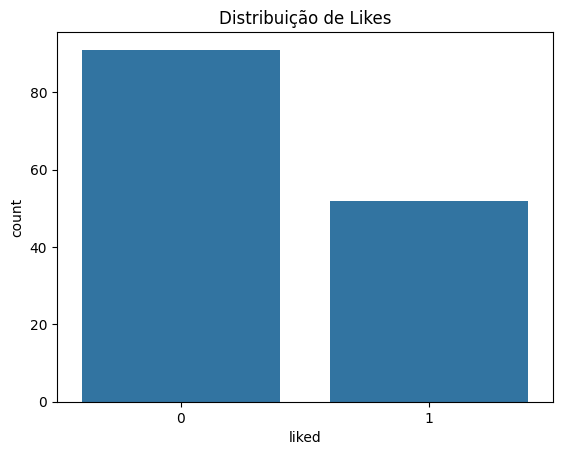

In [10]:
sns.countplot(x='liked', data=df)
plt.title('Distribuição de Likes')
plt.show()

In [11]:
print(df.describe())

         duration_ms  music_popularity  artist_popularity     followers  \
count     143.000000        143.000000         143.000000  1.430000e+02   
mean   243928.678322         49.678322          75.111888  1.236618e+07   
std     64242.253316         33.992667          10.023989  1.963722e+07   
min    121813.000000          0.000000          38.000000  4.414200e+04   
25%    202702.500000          3.500000          69.500000  3.011478e+06   
50%    233973.000000         69.000000          76.000000  5.869309e+06   
75%    269673.000000         78.000000          81.500000  1.268315e+07   
max    544925.000000         92.000000          93.000000  1.210001e+08   

            liked  
count  143.000000  
mean     0.363636  
std      0.482737  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


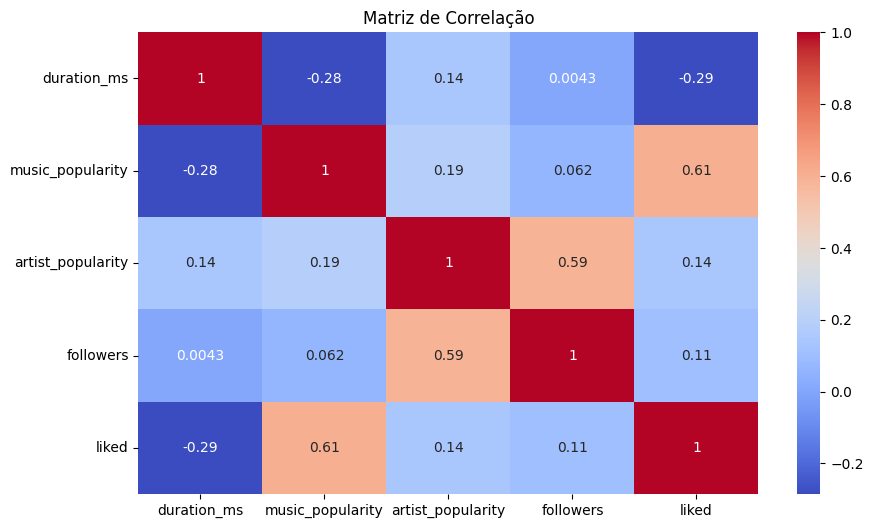

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot= True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [17]:
print(df['genres'].unique())

["['k-pop']" "['singer-songwriter']" "['r&b', 'neo soul']" "['r&b']"
 "['christmas']" "['britpop', 'madchester']" "['soft pop']"
 "['retro soul']" "['country']" "['acid jazz']" "['surf rock']"
 "['soft pop', 'acoustic pop']"
 "['modern blues', 'blues rock', 'blues', 'soul blues']" "['pop']"
 "['indie folk']" "['classic rock', 'yacht rock', 'soft rock']"
 "['soft pop', 'pop']" "['motown', 'classic soul', 'soul']"
 "['opm', 'pinoy indie', 'harana', 'p-pop', 'kundiman']" "['indie']"
 "['pop punk', 'emo']" "['bedroom pop']" "['disco']"
 "['new wave', 'synthpop']" "['reggae', 'mpb', 'roots reggae']"
 "['yacht rock']" "['classic rock', 'rock', 'glam rock']"
 "['garage rock', 'blues rock', 'rock', 'alternative rock']"
 "['nu metal', 'rap metal', 'rock', 'alternative metal']"
 "['punk', 'hardcore punk']"
 "['rock', 'post-grunge', 'alternative rock', 'grunge']"
 "['punk', 'skate punk']"
 "['rock', 'glam metal', 'hard rock', 'classic rock']"
 "['classic rock', 'acid rock']" "['southern gothic']"

In [18]:
from ast import literal_eval

In [19]:
df['genres'] = df['genres'].apply(literal_eval)

In [20]:
df_exploded = df.explode('genres')

In [21]:
top_genres = df_exploded['genres'].value_counts().head(10)
print(top_genres)

genres
rock                 41
post-grunge          32
alternative metal    31
nu metal             26
classic rock         17
alternative rock     13
rap metal            12
grunge               12
punk                 11
soft pop              8
Name: count, dtype: int64


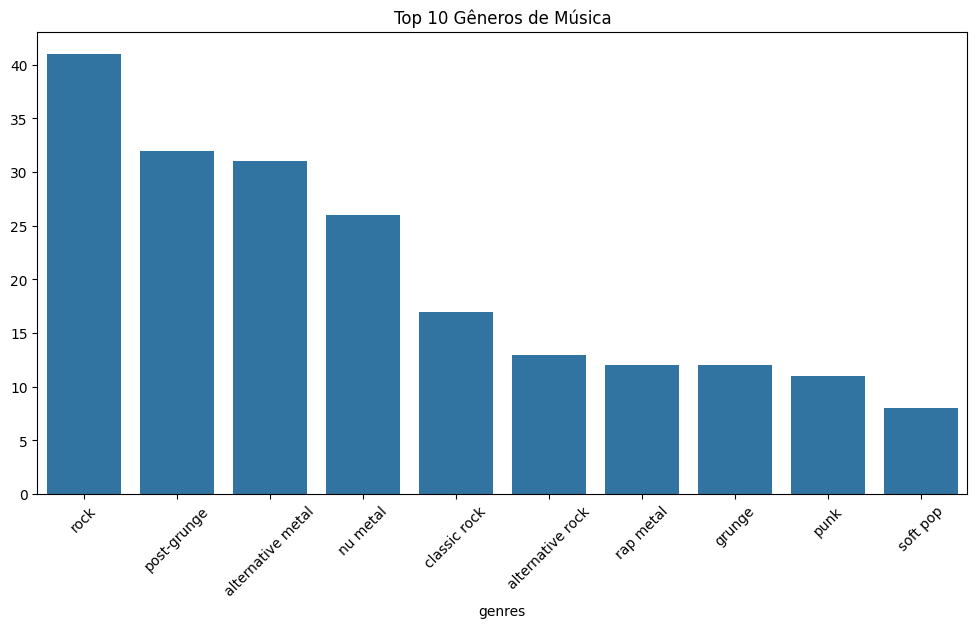

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Gêneros de Música')
plt.xticks(rotation=45)
plt.show()

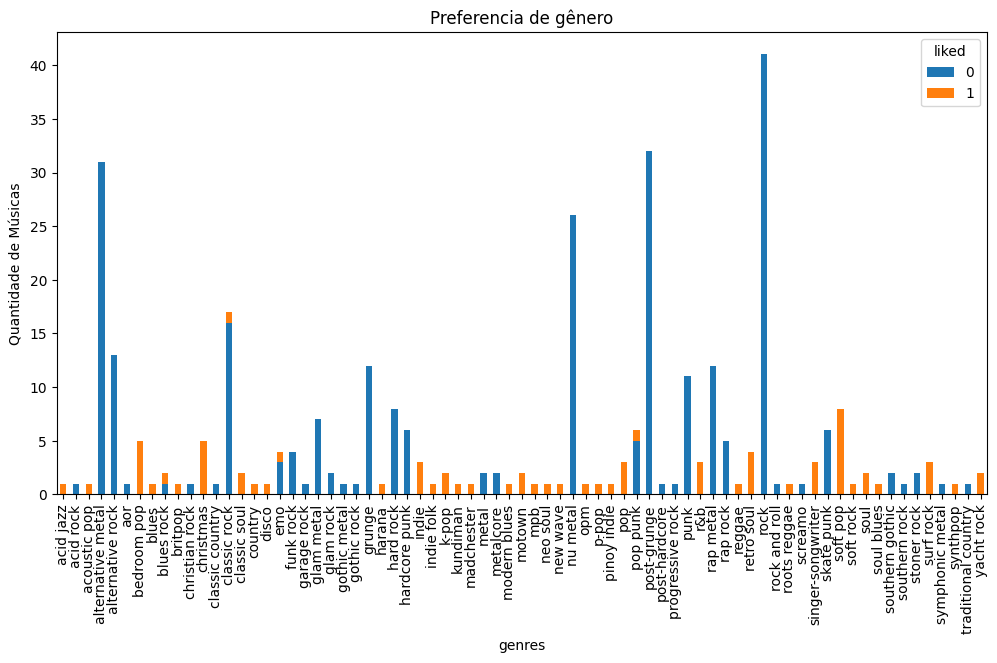

In [23]:
genre_liked = df_exploded.groupby(['genres','liked']).size().unstack().fillna(0)
genre_liked.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Preferencia de gênero')
plt.ylabel('Quantidade de Músicas')
plt.show()

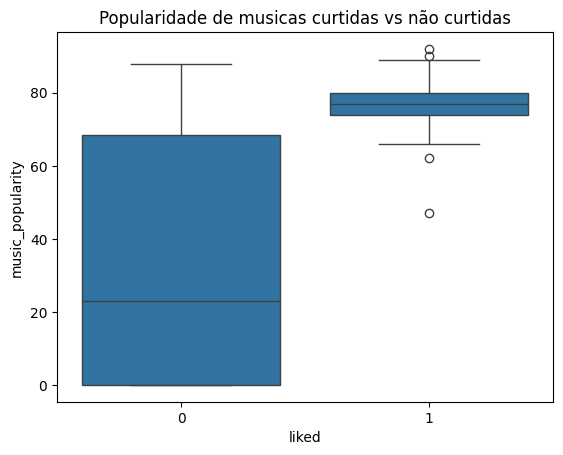

In [25]:
sns.boxplot(x='liked', y='music_popularity', data=df)
plt.title('Popularidade de musicas curtidas vs não curtidas')
plt.show()

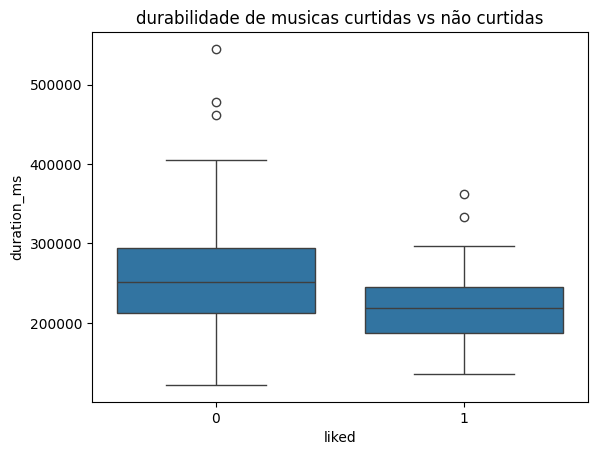

In [26]:
sns.boxplot(x='liked', y='duration_ms', data=df)
plt.title('durabilidade de musicas curtidas vs não curtidas')
plt.show()